In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



!pip install yahoofinancials
import yfinance as yf

from yahoofinancials import YahooFinancials

In [ ]:
#df = web.DataReader('TITAN.NS',data_source='yahoo',start='2012-01-01',end='2022-05-08')


df = yf.download('TITAN.NS', start='2012-01-01', end='2023-08-13', progress=False)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,171.600006,177.000000,171.350006,175.149994,162.617142,3717480
2012-01-03,176.500000,180.649994,176.500000,179.550003,166.702316,3552588
2012-01-04,180.000000,184.399994,175.600006,177.800003,165.077530,3670612
2012-01-05,178.949997,181.699997,174.050003,176.449997,163.824127,2736557
2012-01-06,175.250000,176.449997,170.500000,172.899994,160.528152,2948089
...,...,...,...,...,...,...
2023-08-07,2919.949951,2919.949951,2882.449951,2904.600098,2904.600098,580359
2023-08-08,2918.000000,2932.000000,2904.600098,2921.250000,2921.250000,474417
2023-08-09,2924.000000,2962.000000,2918.149902,2955.899902,2955.899902,600081


In [ ]:
df.shape

(2865, 6)

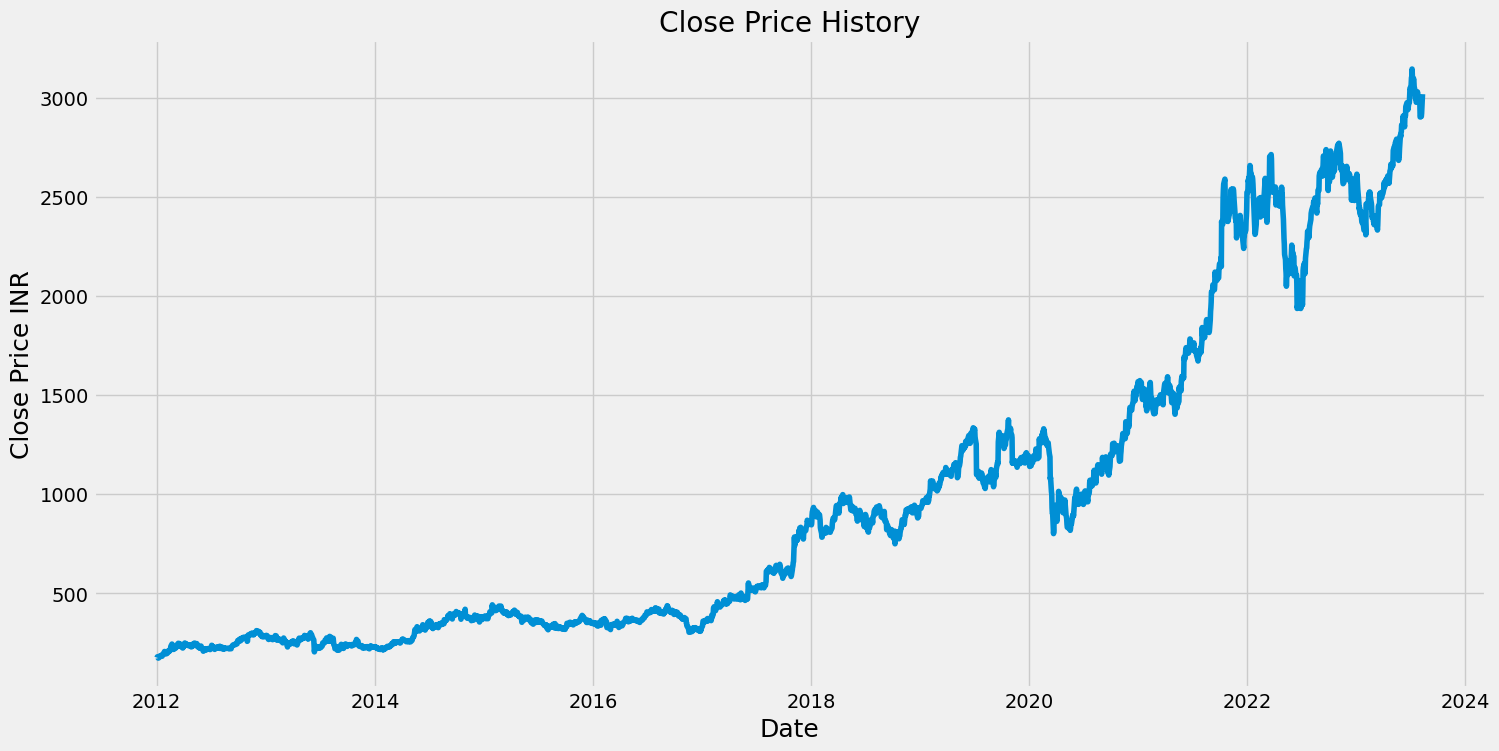

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[7.57295276e-04],
       [2.23823134e-03],
       [1.64922391e-03],
       ...,
       [9.36690082e-01],
       [9.47679327e-01],
       [9.57339033e-01]])

In [ ]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.0007573 , 0.00223823, 0.00164922, 0.00119484, 0.        ,
       0.00089193, 0.00267578, 0.00366868, 0.00380331, 0.0033321 ,
       0.0038538 , 0.00393794, 0.00368551, 0.00319747, 0.00639494,
       0.00622665, 0.0064286 , 0.00841439, 0.01129212, 0.00960924,
       0.01013093, 0.00784221, 0.00727004, 0.0080105 , 0.00854903,
       0.00918852, 0.01206624, 0.01267208, 0.0114604 , 0.0120999 ,
       0.01218404, 0.01514591, 0.01435496, 0.01987479, 0.02388005,
       0.01790583, 0.01760291, 0.01787217, 0.01477568, 0.01758608,
       0.01867995, 0.01883141, 0.01905019, 0.01718219, 0.01948773,
       0.01968968, 0.0225674 , 0.02463734, 0.02512538, 0.02526001,
       0.01995894, 0.02039649, 0.02088452, 0.02386322, 0.0235603 ,
       0.02043015, 0.01997577, 0.01883141, 0.02187742, 0.01711488])]
[0.018713609770555292]



In [ ]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(2232, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2232, 60, 1)

In [ ]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2232/2232 [==============================] - 41s 17ms/step - loss: 3.9635e-04


In [ ]:
model.save('keras_model.h5')

In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 11ms/step


In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

96.52021645869948

<ipython-input-55-2be6b86c12c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


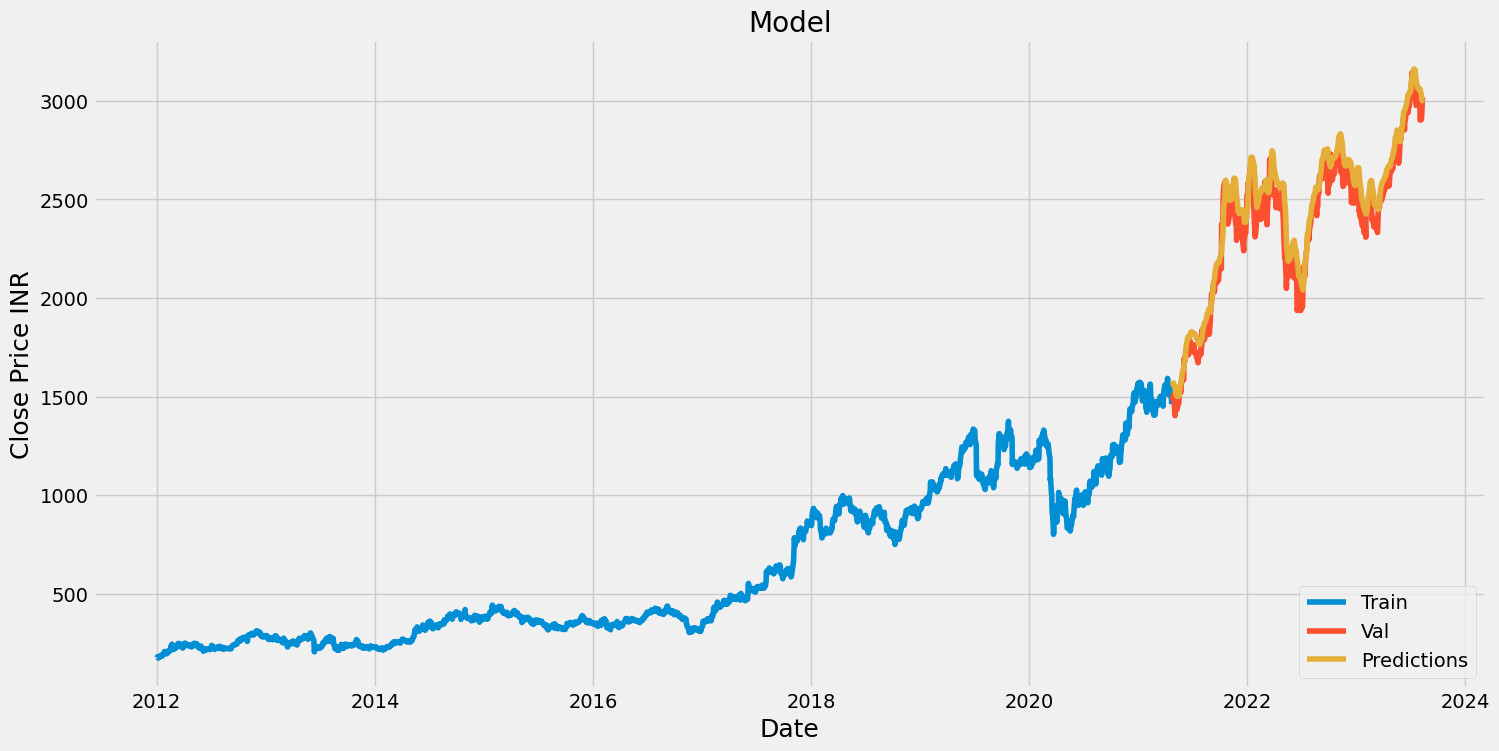

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-04-26,1479.849976,1580.210449
2021-04-27,1495.099976,1568.334961
2021-04-28,1508.849976,1560.401367
2021-04-29,1506.800049,1557.176880
2021-04-30,1491.650024,1556.660522
...,...,...
2023-08-07,2904.600098,3031.607178
2023-08-08,2921.250000,3015.927246
2023-08-09,2955.899902,3004.241211


In [ ]:
#Get the quote
apple_quote=yf.download('TITAN.NS', start='2012-01-01', end='2022-08-13', progress=False)
#create a new dataframe
new_df=apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to a numpy array
X_test=np.array(X_test)
#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 22ms/step
[[2532.019]]


In [ ]:
#Get the quote

apple_quote2=yf.download('TITAN.NS', start='2023-08-10', end='2023-08-11', progress=False)
print(apple_quote2['Close'])

Date
2023-08-10    2988.550049
Name: Close, dtype: float64


In [ ]:
print(X_test)

[[[0.66108514]
  [0.66588134]
  [0.66216216]
  [0.65312507]
  [0.66273433]
  [0.6651745 ]
  [0.70108711]
  [0.68765777]
  [0.68146481]
  [0.6893238 ]
  [0.68375346]
  [0.68178454]
  [0.64888427]
  [0.65832523]
  [0.66197703]
  [0.66283531]
  [0.64942274]
  [0.64928814]
  [0.65031472]
  [0.6354717 ]
  [0.59356802]
  [0.60206656]
  [0.64124402]
  [0.62545857]
  [0.62889167]
  [0.63030527]
  [0.62852144]
  [0.60420385]
  [0.59346708]
  [0.5951836 ]
  [0.59684964]
  [0.60233584]
  [0.59955909]
  [0.61951804]
  [0.65787082]
  [0.66354216]
  [0.67002124]
  [0.65871226]
  [0.65245192]
  [0.65785398]
  [0.67880581]
  [0.6948773 ]
  [0.69613946]
  [0.70623673]
  [0.7120932 ]
  [0.72434452]
  [0.72564037]
  [0.7136414 ]
  [0.71712499]
  [0.72759244]
  [0.73344891]
  [0.74159402]
  [0.74452221]
  [0.7551075 ]
  [0.75754768]
  [0.76062739]
  [0.76538991]
  [0.76089667]
  [0.77393898]
  [0.7738043 ]]]
